The task is to make an exploratorary data analysis on [given data](../data/raw%20data).

# Plan 

We are given an excel table and a bunch of photos. What we gonna do is:
- parse .xlsx file to DataFrame, so we can conviniently work with it
- parse name from given photos
- draw some plots

# Solution 

In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's start from parsing .xlsx:

## .xlsx parsing 

In [236]:
df = pd.read_excel("../data/raw data/Послойное описание с фотографиями.xlsx")

That is what we have after reading raw excel file:

In [444]:
display(df.head())

,Месторождение,Скважина,"Интервал отбора керна, м (Кровля)","Интервал отбора керна, м (Подошва)","Интервал отбора керна, м (после привязки) (Кровля)","Интервал отбора керна, м (после привязки) (Подошва)",Фактический вынос (м),Фактический вынос (%),Стратиграфическая единица,Слой (Кровля),Слой (Подошва),Слой (Толщина),Классификация (Порода),Классификация (Карбонатность),Классификация (Разрушенность),Классификация (Насыщение),Полное описание (старый формат),"Профильные методы, среднее значение по слою (Общая радио активность, API)","Профильные методы, среднее значение по слою (Плотность, г/см3)","Профильные методы, среднее значение по слою (Проницаемость, мД)"
0,1.0,2.0,1957.1,1963.1,1958.3,1964.3,5.93,0.988333,НП\2-3,0.00,1.45,1.45,песчаник,не карбонатный,не разрушен,нефтенасыщенные,"Песчаник светло-серый с коричневатым оттенком,...",65.921720,2.412277,2.079148
1,1.0,2.0,1957.1,1963.1,1958.3,1964.3,5.93,0.988333,НП\2-3,1.45,3.54,2.09,алевролит,не карбонатный,не разрушен,не опред.,Алевролит серый от мелко-крупнозернистого до м...,78.734522,2.486175,0.490632
2,1.0,2.0,1957.1,1963.1,1958.3,1964.3,5.93,0.988333,НП\2-3,3.54,5.85,2.31,песчаник,не карбонатный,не разрушен,слабо нефтенасыщенные,Песчаник светло-серый мелкозернистый алевритис...,66.105366,2.441883,22.843947
3,1.0,2.0,1957.1,1963.1,1958.3,1964.3,5.93,0.988333,НП\2-3,5.85,5.93,0.08,"пересл. песчаника, алевролита и глин",не карбонатный,не разрушен,пятнисто нефтенасыщенные,Тонкое неравномерное переслаивание алевролита ...,64.195236,2.443174,38.450000
4,1.0,2.0,1963.1,1978.1,1964.3,1979.3,15.00,1.000000,НП\2-3,0.00,1.26,1.26,песчаник,не карбонатный,не разрушен,слабо нефтенасыщенные,Песчаник светло-серый мелко-среднезернистый до...,60.734262,2.458812,22.261125


In [238]:
# Drop unused columns.
df.drop(df.columns[19:35],axis=1,inplace=True)    # Blank columns.
df.drop(df.columns[12:14], axis=1, inplace=True)  # Photos columns.

In [239]:
# Merging together 1st and 2nd rows.
fst_row = list(df.iloc[0])
snd_row = list(df.iloc[1])

# If value from fst row == nan, then replace nan with value from prev value.
for i in range(len(fst_row)):
    if (fst_row[i]!=fst_row[i]):
        fst_row[i] = fst_row[i-1]
    if "\n" in fst_row[i]:
        fst_row[i] = fst_row[i].replace("\n", " ")

# If value from snd row != nan, then add it to fst row.
for i in range(len(fst_row)):
    if (snd_row[i]==snd_row[i]):
        fst_row[i] += " ({})".format(snd_row[i])        

# Replce fst row with received row.
df.iloc[0] = fst_row

# Changing column names.
df.columns = df.iloc[0]

In [240]:
# Dropping 2nd and 3rd rows (3rd row - numeration).
df = df.drop([0,1,2])

# Resetting indexes.
df = df.reset_index(drop=True)

In [241]:
# Changing types to float where possible.
columns = list(df.columns)
columns = columns[0:8]+columns[9:12]+columns[17:20]

df[columns] = df[columns].astype(float)

That's what we've got:

In [445]:
display(df.head())

,Месторождение,Скважина,"Интервал отбора керна, м (Кровля)","Интервал отбора керна, м (Подошва)","Интервал отбора керна, м (после привязки) (Кровля)","Интервал отбора керна, м (после привязки) (Подошва)",Фактический вынос (м),Фактический вынос (%),Стратиграфическая единица,Слой (Кровля),Слой (Подошва),Слой (Толщина),Классификация (Порода),Классификация (Карбонатность),Классификация (Разрушенность),Классификация (Насыщение),Полное описание (старый формат),"Профильные методы, среднее значение по слою (Общая радио активность, API)","Профильные методы, среднее значение по слою (Плотность, г/см3)","Профильные методы, среднее значение по слою (Проницаемость, мД)"
0,1.0,2.0,1957.1,1963.1,1958.3,1964.3,5.93,0.988333,НП\2-3,0.00,1.45,1.45,песчаник,не карбонатный,не разрушен,нефтенасыщенные,"Песчаник светло-серый с коричневатым оттенком,...",65.921720,2.412277,2.079148
1,1.0,2.0,1957.1,1963.1,1958.3,1964.3,5.93,0.988333,НП\2-3,1.45,3.54,2.09,алевролит,не карбонатный,не разрушен,не опред.,Алевролит серый от мелко-крупнозернистого до м...,78.734522,2.486175,0.490632
2,1.0,2.0,1957.1,1963.1,1958.3,1964.3,5.93,0.988333,НП\2-3,3.54,5.85,2.31,песчаник,не карбонатный,не разрушен,слабо нефтенасыщенные,Песчаник светло-серый мелкозернистый алевритис...,66.105366,2.441883,22.843947
3,1.0,2.0,1957.1,1963.1,1958.3,1964.3,5.93,0.988333,НП\2-3,5.85,5.93,0.08,"пересл. песчаника, алевролита и глин",не карбонатный,не разрушен,пятнисто нефтенасыщенные,Тонкое неравномерное переслаивание алевролита ...,64.195236,2.443174,38.450000
4,1.0,2.0,1963.1,1978.1,1964.3,1979.3,15.00,1.000000,НП\2-3,0.00,1.26,1.26,песчаник,не карбонатный,не разрушен,слабо нефтенасыщенные,Песчаник светло-серый мелко-среднезернистый до...,60.734262,2.458812,22.261125


##  .xlsx analyzing

Now we have all data prepared, so let's take a look on it.

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 20 columns):
Месторождение                                                                52 non-null float64
Скважина                                                                     52 non-null float64
Интервал отбора керна, м (Кровля)                                            52 non-null float64
Интервал отбора керна, м (Подошва)                                           52 non-null float64
Интервал отбора керна, м (после привязки) (Кровля)                           52 non-null float64
Интервал отбора керна, м (после привязки) (Подошва)                          52 non-null float64
Фактический вынос (м)                                                        52 non-null float64
Фактический вынос (%)                                                        52 non-null float64
Стратиграфическая единица                                                    52 non-null object
Слой (Кровля)            

All float object have corresponding type.

In [451]:
display(df.describe())

,Месторождение,Скважина,"Интервал отбора керна, м (Кровля)","Интервал отбора керна, м (Подошва)","Интервал отбора керна, м (после привязки) (Кровля)","Интервал отбора керна, м (после привязки) (Подошва)",Фактический вынос (м),Фактический вынос (%),Слой (Кровля),Слой (Подошва),Слой (Толщина),"Профильные методы, среднее значение по слою (Общая радио активность, API)","Профильные методы, среднее значение по слою (Плотность, г/см3)","Профильные методы, среднее значение по слою (Проницаемость, мД)"
count,52.0,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1.0,2.0,2031.368077,2043.483077,2032.654615,2044.769615,12.092692,0.994197,4.381154,5.664808,1.283654,67.079364,2.497749,6.246265
std,0.0,0.0,95.668992,96.291088,95.805202,96.427562,4.448389,0.019489,3.726577,4.057599,1.503611,8.670555,0.056785,8.989631
min,1.0,2.0,1957.100000,1963.100000,1958.300000,1964.300000,2.880000,0.917197,0.000000,0.310000,0.080000,47.510938,2.338011,0.010000
25%,1.0,2.0,1963.100000,1978.100000,1964.300000,1979.300000,6.735000,1.000000,1.420000,2.537500,0.325000,60.673190,2.460604,0.371021
50%,1.0,2.0,1979.670000,1988.750000,1980.870000,1989.950000,14.960000,1.000000,4.130000,5.000000,0.760000,66.340135,2.500482,1.727099
75%,1.0,2.0,2176.060000,2191.020000,2177.560000,2192.520000,15.000000,1.000000,5.772500,7.002500,1.510000,71.535949,2.536002,7.159025
max,1.0,2.0,2191.020000,2198.000000,2192.520000,2199.500000,15.000000,1.000000,14.440000,15.000000,7.930000,87.314407,2.610877,38.450000


Let us see distribution of our parameters.

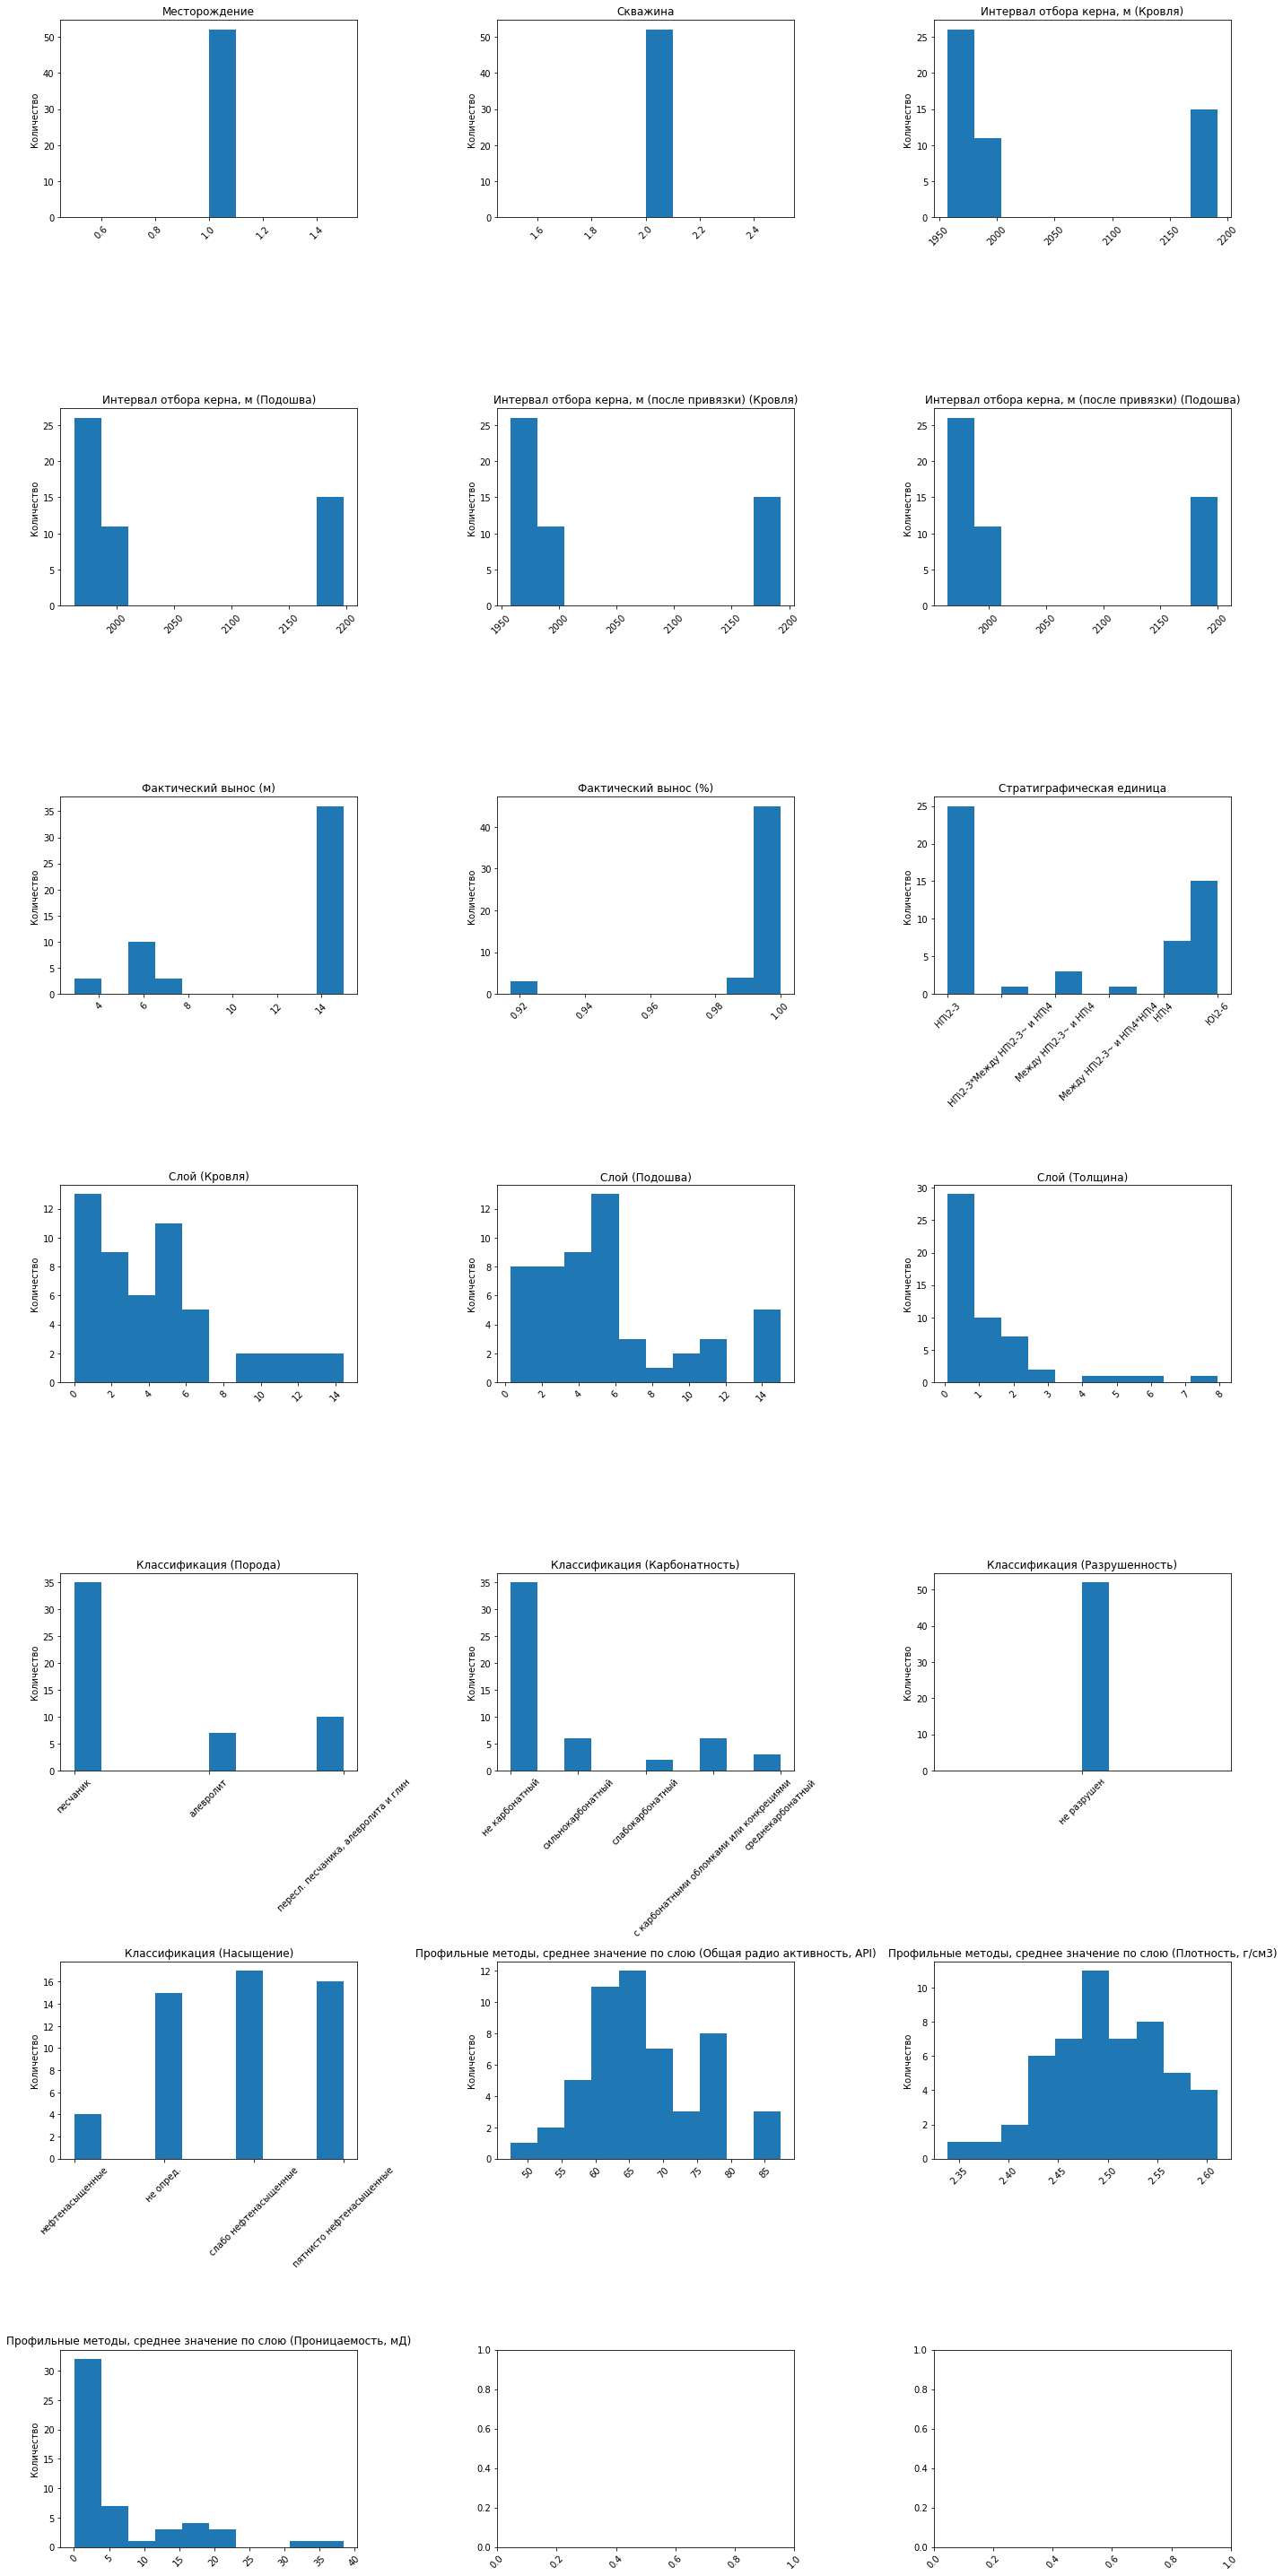

In [468]:
y_len = 7       # Number of plots on y axe.
x_len = 3         # Number of plots on x axe.
cur_column = 0     # Columns iterator.
columns = list(df.columns)
columns.remove("Полное описание (старый формат)")

fig, axs = plt.subplots(y_len, x_len, figsize = (20,40))


for i in range(y_len):
    for j in range(x_len):
        if (cur_column > (len(columns)-1)):
            break
        axs[i, j].hist(df[columns[cur_column]])
        axs[i, j].set_title(columns[cur_column]) 
        axs[i, j].set_ylabel("Количество") 
        cur_column += 1

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Most important things we can see is that in given data much more rows describe sandstone comparing to other cores. Also more "Не карбонатный" data. Another thing is the fact that we are not given data about broken samples. Also, there is high percentage of non determined oil fillness samples. "Проницаемость" is not distributed normally.

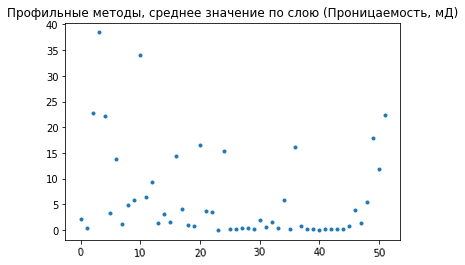

In [456]:
plt.plot(df["Профильные методы, среднее значение по слою (Проницаемость, мД)"],".")
plt.xticks(rotation=4)
plt.title("Профильные методы, среднее значение по слою (Проницаемость, мД)")
plt.show()

In [452]:
display(df["Классификация (Порода)"].value_counts())

песчаник                                35
пересл. песчаника, алевролита и глин    10
алевролит                                7
Name: Классификация (Порода), dtype: int64

In [453]:
display(df["Классификация (Карбонатность)"].value_counts())

не карбонатный                              35
сильнокарбонатный                            6
с карбонатными обломками или конкрециями     6
среднекарбонатный                            3
слабокарбонатный                             2
Name: Классификация (Карбонатность), dtype: int64

In [454]:
display(df["Классификация (Разрушенность)"].value_counts())

не разрушен    52
Name: Классификация (Разрушенность), dtype: int64

In [455]:
display(df["Классификация (Насыщение)"].value_counts())

слабо нефтенасыщенные       17
пятнисто нефтенасыщенные    16
не опред.                   15
нефтенасыщенные              4
Name: Классификация (Насыщение), dtype: int64

Later we will exclude some params as "Месторождение", "Скважина". From 4 "Интервал отбора керна, м" we will leave only one. Excluding "Фактический вынос (м)" and "Полное описание (старый формат)".

Let's search for some dependicies between "Классификация (Насыщение)" and other params.

In [524]:
columns = list(df.columns)
columns = columns[2:3] + columns[7:8] + columns[8:10]+ columns[12:16] + columns[17:]

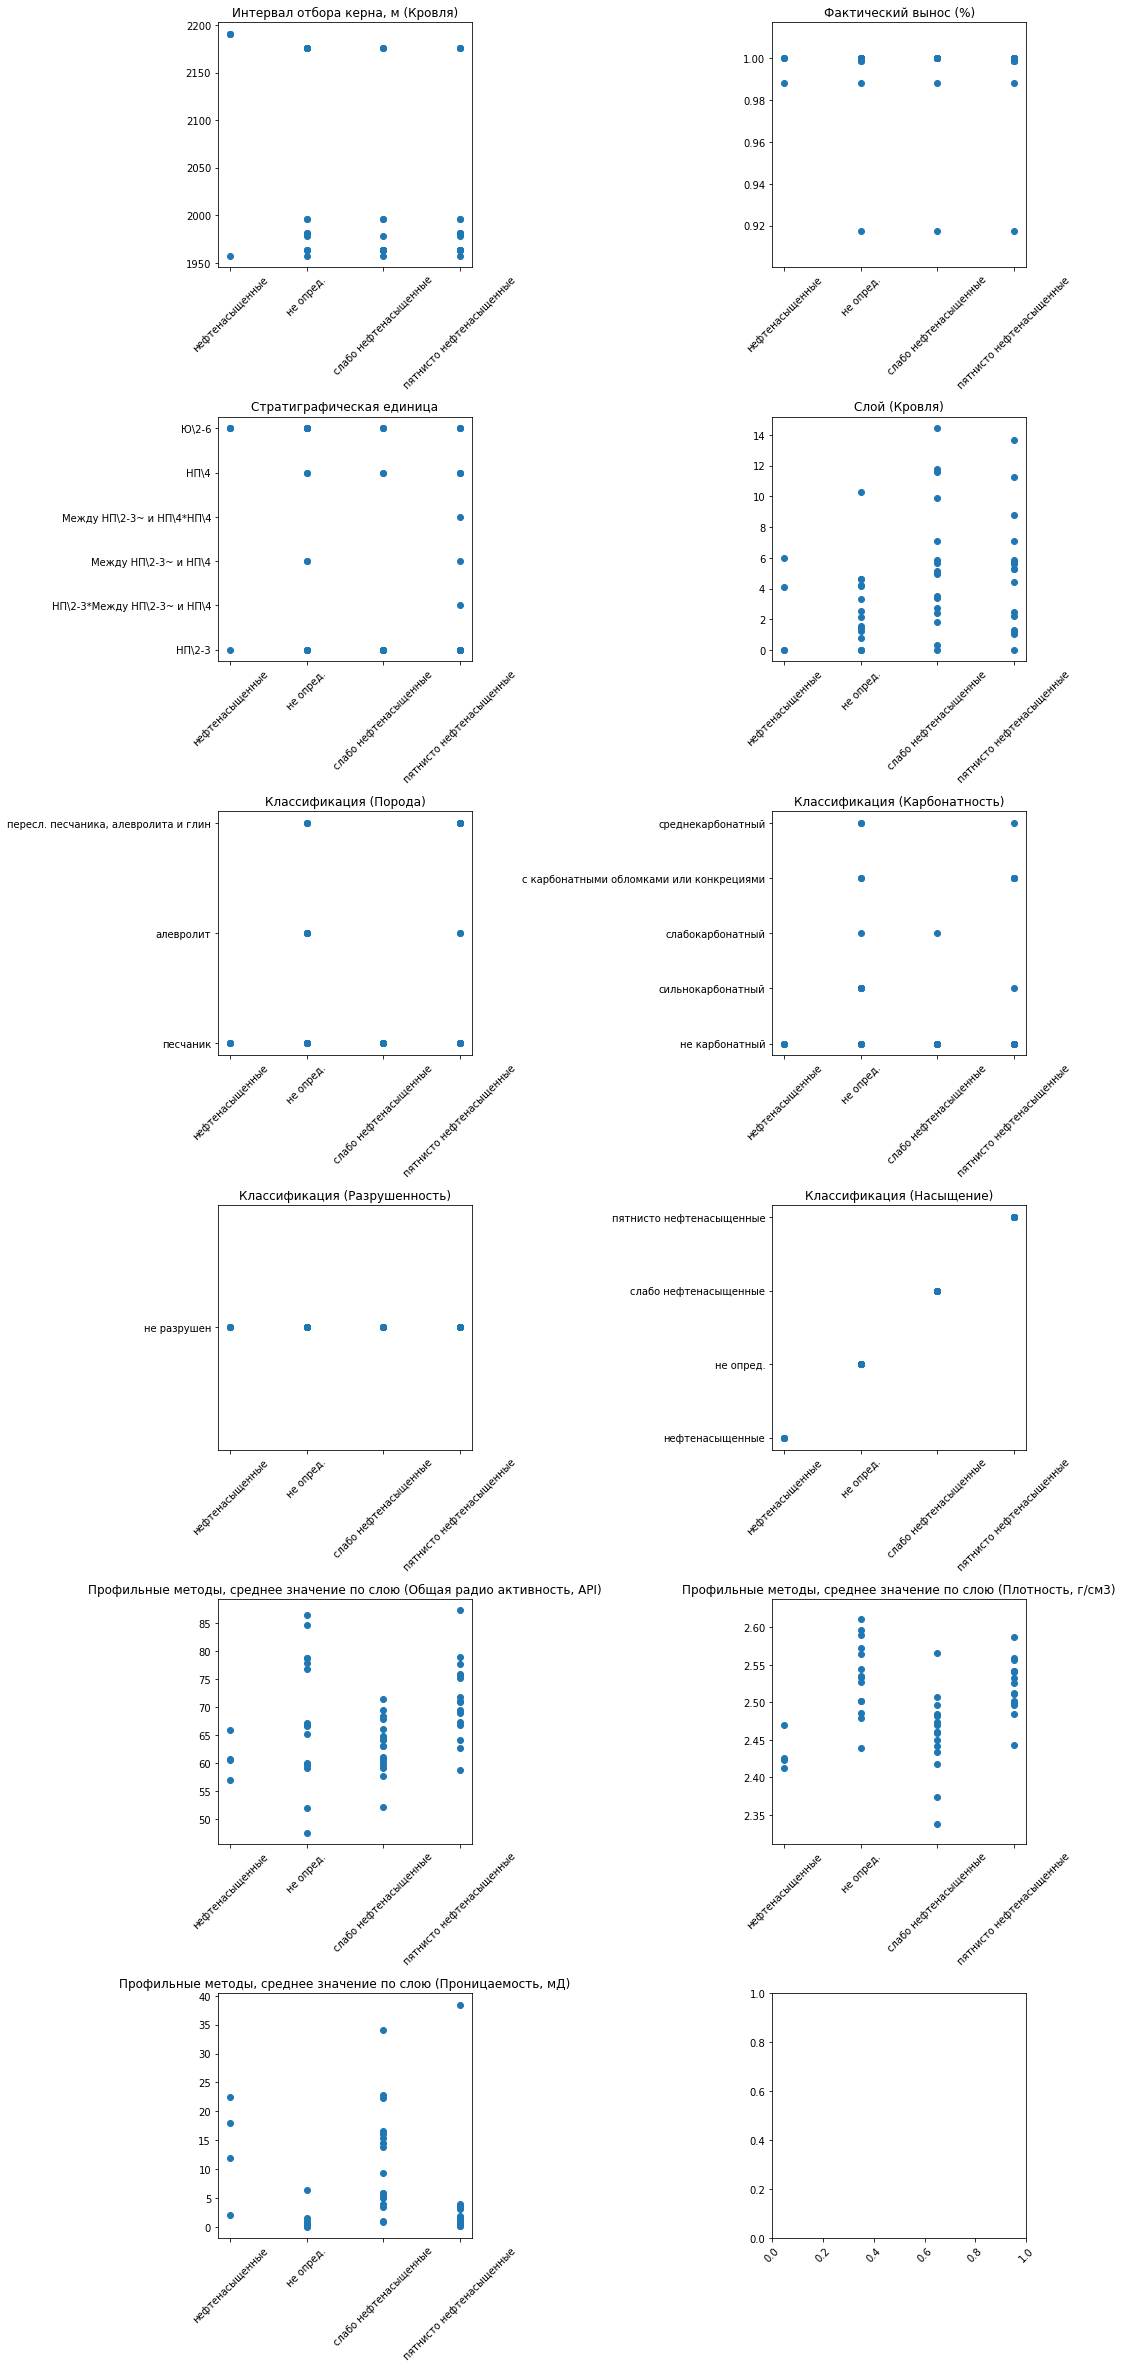

In [514]:
y_len = 6          # Number of plots on y axe.
x_len = 2          # Number of plots on x axe.
cur_column = 0     # Columns iterator.

fig, axs = plt.subplots(y_len, x_len, figsize = (15,33))


for i in range(y_len):
    for j in range(x_len):
        if (cur_column > (len(columns)-1)):
            break
        axs[i, j].scatter(df["Классификация (Насыщение)"], df[columns[cur_column]])
        axs[i, j].set_title(columns[cur_column]) 

        cur_column += 1

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

"Нефтенасыщенные" cores have radioactivity between 57 and 67. Also, sandstone have all the oil categories (it is too many of it). Also "Нефтенасыщенность" correlates with "Плотность" (2.42 - 2.48).

Now let's draw a correlation square.

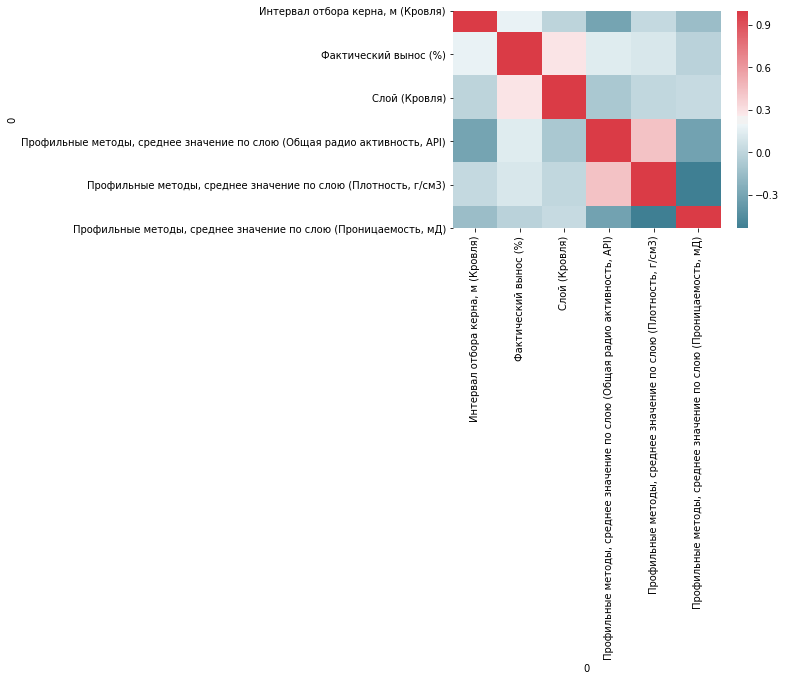

In [534]:
corr = df[columns].corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

"Плотность" and "Радиоактивность" correlates positively to each other. But "Плотность" and "Проницаемость" correlates negatively.

## Images parsing 

## Images analyzing 

# Conclusion 

So, we end up analyzing .xlsx and images.

## .xlsx conclusion 

We have no data about "Разрушенные" samples so we can't predict them. "Плотность" and "Радиоактивность" correlates positively to each other. But "Плотность" and "Проницаемость" correlates negatively. We have no data about non-filled with oil cores. "Проницаемость" and "Классификация" is not distributed normally.

## Images conclusion